### Python 2.7


# Exercises - Interpolation (20 points)

A) -**5 points**- Write a program in Python that given a set of N points in $x$ and $y$ returns a plot of the interpolating Lagrange polynomial.

In [417]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Test it with the following arrays:

# Lagrange polynomial

[Lagrange polynomials](http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set. The Lagrange polynomial is the polynomial of the least degree that passes through each data point in the set. **The interpolating polynomial of the least degree is unique.**

Given a set of points as defined above, the Lagrange polynomial is defined as the linear combination

$$L(x) = \sum_{i=0}^{N} y_i \ell_i(x).$$

The functions $\ell_i$ are known as the *Lagrange basis polynomials* defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_k)}{(x_i-x_k)},$$

where $0\le i\le N$.

Notice from the definition the requirement that no two $x_i$ are the same, $x_i - x_m \neq 0$, so this expression is always well-defined (i.e. we never get a divide by zero!) The reason pairs $x_i = x_j$ with $y_i\neq y_j$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a function can only get one value for each argument $x_i$. On the other hand, if also $y_i = y_j$, then those two points would actually be one single point.

For all $i\neq j$, $\ell_j(x)$ includes the term $(x-x_i)$ in the numerator, so the whole product will be zero at $x=x_i$:

$\ell_{j\ne i}(x_i) = \prod_{m\neq j} \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_k)}{(x_j-x_k)} = 0$.

On the other hand,

$\ell_i(x_i) := \prod_{m\neq i} \frac{x_i-x_m}{x_i-x_m} = 1$

In other words, all basis polynomials are zero at $x=x_i$, except $\ell_i(x)$, for which it holds that $\ell_i(x_i)=1$, because it lacks the $(x-x_i)$ term.

It follows that $y_i \ell_i(x_i)=y_i$, so at each point $x_i$, $L(x_i)=y_i+0+0+\dots +0=y_i$, showing that $L$ interpolates the function exactly.

To help illustrate our discussion lets first create some data in Python and take a look at it.

In [418]:
x_in = np.array([1.0,2.0,4.0,5.0,6.0,7.0,8.0])
y_in = np.array([3.0,-2.0,2.0,4.0,1.0,2.0,3.0])

In [419]:
def l(j, x):#Lagrange basis polynomials 
    l =1
    for i in range( len(x_in) ):
        if( i != j ):
            l = l * ( x - x_in[i] )/(x_in[j]-x_in[i])
    return l

In [420]:
def L(x):#Polinomio de Lagrange 
    Lt=0
    for i in range( len(x_in) ):
        Lt = Lt + (y_in[i] * l(i,x) )
    return Lt

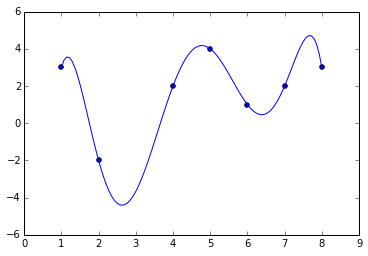

In [421]:
plt.scatter(x_in,y_in)
x=np.linspace(x_in[0],x_in[len(x_in)-1],100)
plt.plot(x,L(x))

B) -**10 points**- Find and plot the interpolating polinomials for the three set of points taken from the following function

In [422]:
def p(x):
    return 1.0/(5.0-75.0*x**2)

In [423]:
a = np.linspace(-1.0,1.0,3)
print(p(a))
b = np.linspace(-1.0,1.0,5)
print(p(b))
c = np.linspace(-1.0,1.0,9)
print(p(c))

[-0.01428571  0.2        -0.01428571]
[-0.01428571 -0.07272727  0.2        -0.07272727 -0.01428571]
[-0.01428571 -0.02689076 -0.07272727  3.2         0.2         3.2
 -0.07272727 -0.02689076 -0.01428571]


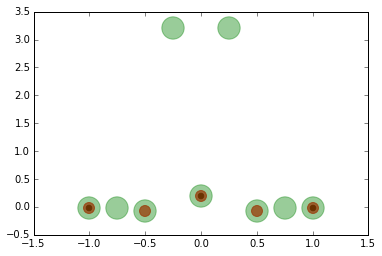

In [424]:
plt.scatter(a,p(a), color="black", alpha=1.0, s=30)
plt.scatter(b,p(b), color="red", alpha=0.7,s=120)
plt.scatter(c,p(c), color="green", alpha=0.4,s=500)

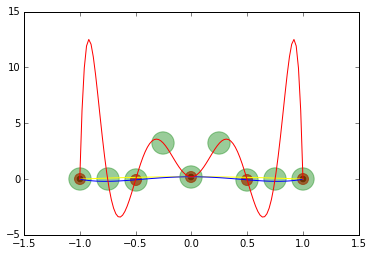

In [425]:
plt.scatter(a,p(a), color="black", alpha=1.0, s=30)
plt.scatter(b,p(b), color="red", alpha=0.7,s=120)
plt.scatter(c,p(c), color="green", alpha=0.4,s=500)

#Hago el ajuste con la funcion antes generada
x = np.linspace(-1,1,100)
x_in = a
y_in = p(a)
plt.plot(x,L(x),'yellow' )
x_in=b
y_in=p(b)
plt.plot(x,L(x), 'blue' )
x_in=c
y_in=p(c)
plt.plot(x,L(x), 'red' )

C) -**5 points**-
Determine the quadratic polynomial $p(x)$ that interpolates the data
$$
(-1,3),~~(0,-1),~~(1,2)
$$
Using:
- The Lagrange form of interpolating polynomials.
- Linear Least Squares

In [426]:
x_in = [-1,0,1]
y_in = [3,-1,2]
x = np.linspace(-1,1,100)

 ### solucion por Lagrange

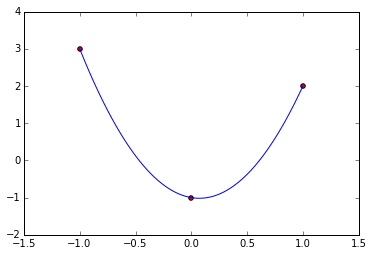

In [427]:
plt.plot(x,L(x), 'blue' )
plt.scatter(x_in,y_in, c='red')

#### Minimos Cuadrados

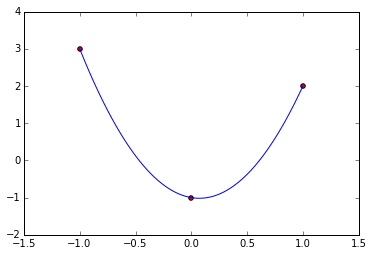

In [428]:
A=np.zeros((3,3))

for i in range(3):
    A[i] = x_in[i]**2, x_in[i], 1  # Store one row at a time

sol = np.linalg.solve(A,y_in)
y = sol[0]*x**2 + sol[1]*x + sol[2]
plt.scatter(x_in,y_in, c='red')
plt.plot(x,y)

# Exercises - PCA (80 points)

Sugerencia: Usar pandas, el módulo PCA de sklearn.decomposition, y el módulo GMM de sklearn.mixture



A) -**20 puntos**- Haga el Análisis de Componentes Principales (PCA) con dos componentes sobre los datos en el archivo 'lluvia.csv'. ¿Cuál es la varianza total explicada por tomar dos componentes?
B) -**20 puntos**- Haga un gráfico de dispersión de ambas componentes, donde la escala de colores esté dada por el promedio de precipitación para cada estación. ¿Sirvió el PCA para distinguir unas estaciones de otras? Haga otro gráfico donde la escala de colores corresponda a la altura de la estación. ¿Hay alguna correlación con la altura?
C) -**20 puntos**- Haga un análisis de clustering por Mixtura Gaussiana (GMM) sobre los componentes principales, con 2 y 3 clusters. Para cada caso, repita la gráfica de las componentes principales donde la escala de colores corresponda a la identificación de cada cluster, de manera que se vean las distintas "poblaciones" o clusters que produce el análisis de clustering. 
D) -**20 puntos**- Grafique el promedio mes-a-mes de precipitación para cada "población" o cluster, donde las barras de error estén dadas por la desviación estándar. ¿Hay algún comportamiento similar para cada "población"?
E) -**10 puntos extra**- Grafique la ubicación geográfica de las estaciones que corresponden a cada "población". ¿Hay alguna correlación evidente? Justifique sus conclusiones
F) Disculpen el spanglish


Sobre la Mixtura Gaussiana: https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/


In [429]:
%%bash 
wget https://github.com/ComputoCienciasUniandes/MetodosComputacionales/raw/master/homework/2016-01/hw3/lluvia.csv

--2016-03-10 00:15:30--  https://github.com/ComputoCienciasUniandes/MetodosComputacionales/raw/master/homework/2016-01/hw3/lluvia.csv
Resolviendo github.com (github.com)... 192.30.252.129
Conectando con github.com (github.com)[192.30.252.129]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionales/master/homework/2016-01/hw3/lluvia.csv [siguiente]
--2016-03-10 00:15:30--  https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionales/master/homework/2016-01/hw3/lluvia.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 199.27.76.133
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[199.27.76.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 380579 (372K) [text/plain]
Grabando a: “lluvia.csv.4”

     0K .......... .......... .......... .......... .......... 13%  489K 1s
    50K ........

el codigo anterior me permitio usar comandos de la terminal para descargar el archivo lluvia

In [430]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.mixture import GMM

In [431]:
data = pd.read_csv('lluvia.csv')


# A

In [432]:
prec = data.values[:,8:20]#genera un arreglo con todas las precipitaciones

In [433]:
#Hago PCA con 2 componentes
pca=PCA(2)
precpca = pca.fit_transform(prec)
var = pca.explained_variance_.sum(axis=0)#pca.explained_variance_ arroja la varianza para cada componente, la total es la suma de ambas
varat = pca.explained_variance_ratio_.sum(axis=0)#es util ya que me dice que porcentaje estoy explicando asi como hicimos con las fotos de Bush
print "la varianza total explicada por tomar dos componentes para las lluvias es ", var
print "la varianza promedio explicada por tomar dos componentes es para las lluvias es", varat

la varianza total explicada por tomar dos componentes para las lluvias es  184499.867801
la varianza promedio explicada por tomar dos componentes es para las lluvias es 0.917276469765


In [434]:
precpca[:, 0]
precpca[:, 1]

array([-115.47946139, -108.33026361,   22.29494462, ...,  279.4952754 ,
        284.78591972,  333.14923546])

# B

In [435]:
len(prec[0])

12

In [436]:
len(prec)
prom = [] #genero los promedio de precipitaciones por estación
for i in range(len(prec)):
    for j in range(len(prec[i])):
        sum+=prec[i][j]
    prom.append(sum/12)
    sum=0


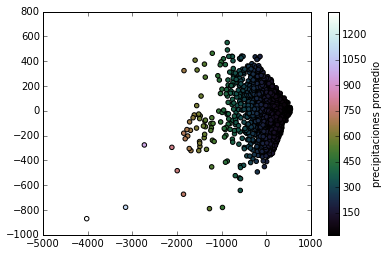

In [437]:
plt.scatter(precpca[:, 0], precpca[:, 1], c=prom, cmap='cubehelix')
plt.colorbar(label='precipitaciones promedio'); #grafico como lo enseña la guia de seattle

podemos ver que entre mas a la derecha menor es la precipitación, esto hace una distincion entre estaciones.

In [438]:
alt1=data.values[:,5]
alt=[]
for i in range (len(alt1)):
    alt.append(alt1[i])  #genera alturas legibles para poner colores


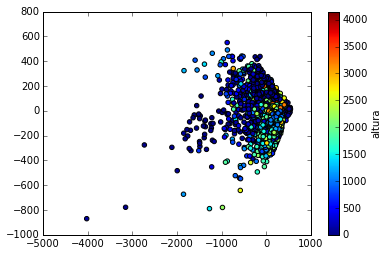

In [439]:
plt.scatter(precpca[:, 0], precpca[:, 1], c=alt)
plt.colorbar(label='altura');

No vemos mucha corelación con la altura 

## C

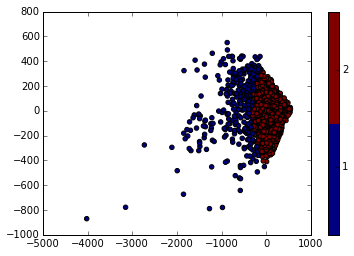

In [440]:
gmm1 = GMM(2, covariance_type='full', random_state=0)
gmm1.fit(precpca)
cluster_label = gmm1.predict(precpca)
plt.scatter(precpca[:, 0], precpca[:, 1], c=cluster_label, cmap=plt.cm.get_cmap('jet', 2));
cb = plt.colorbar(ticks=range(2))
cb.set_ticklabels(['1','2'])
plt.clim(-0.7, 1.6);

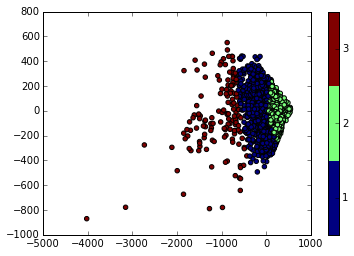

In [441]:
gmm2 = GMM(3, covariance_type='full', random_state=0)
gmm2.fit(precpca)
cluster = gmm2.predict(precpca)
plt.scatter(precpca[:, 0], precpca[:, 1], c=cluster, cmap=plt.cm.get_cmap('jet', 3));
cb = plt.colorbar(ticks=range(3))
cb.set_ticklabels(['1','2','3'])
plt.clim(-0.5, 2.5);

# D

In [442]:
print prec[cluster==0,:][0][:]
print prec[cluster_label==0,:]
print len(prec[cluster==2,:])+len(prec[cluster==1,:])+len(prec[cluster==0,:])
print len(prec[cluster_label==1,:])+len(prec[cluster_label==0,:])

[210.7 230.2 303.3 341.6 333.1 293.7 250.4 229.1 183.3 197.4 256.3 236.2]
[[246.8 233.6 325.2 ..., 283.0 302.0 293.4]
 [158.1 198.4 273.8 ..., 269.1 251.3 212.0]
 [151.1 191.8 250.4 ..., 241.9 227.9 159.0]
 ..., 
 [11.1 17.0 45.4 ..., 167.5 108.8 33.8]
 [16.3 27.8 70.9 ..., 204.6 140.5 41.2]
 [15.7 34.0 75.2 ..., 230.5 150.7 63.9]]
2046
2046


In [443]:
#genera los promedios para cada cluster
sum=0
prom1 = []
for i in range(12):
    for j in range(len(prec[cluster_label==0,:])):
        sum+=prec[cluster_label==0,:][j][i]
    prom1.append(sum/len(prec[cluster_label==0,:]))
    sum=0
    
sum=0
prom2 = []
for i in range(12):
    for j in range(len(prec[cluster_label==1,:])):
        sum+=prec[cluster_label==1,:][j][i]
    prom2.append(sum/len(prec[cluster_label==1,:]))
    sum=0
    
sum=0
prom3 = []
for i in range(12):
    for j in range(len(prec[cluster==0,:])):
        sum+=prec[cluster==0,:][j][i]
    prom3.append(sum/len(prec[cluster==0,:]))
    sum=0
    
sum=0
prom4 = []
for i in range(12):
    for j in range(len(prec[cluster==1,:])):
        sum+=prec[cluster==1,:][j][i]
    prom4.append(sum/len(prec[cluster==1,:]))
    sum=0
    
sum=0
prom5 = []
for i in range(12):
    for j in range(len(prec[cluster==2,:])):
        sum+=prec[cluster==2,:][j][i]
    prom5.append(sum/len(prec[cluster==2,:]))
    sum=0
    

In [444]:
prom1

[192.64293478260862,
 200.55353260869563,
 256.2380434782608,
 395.3684782608695,
 474.721195652174,
 435.38994565217376,
 412.4692934782607,
 390.85597826086956,
 391.9625000000001,
 417.963043478261,
 370.48206521739144,
 264.44510869565215]

(0, 13)

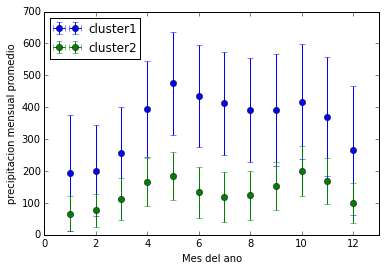

In [445]:
x=np.linspace(1,12,12)
plt.errorbar(x,prom1,xerr=0,label="cluster1",yerr=np.var(prec[cluster_label==0,:],axis=0)**0.5,fmt="o")
plt.errorbar(x,prom2,xerr=0,label="cluster2",yerr=np.var(prec[cluster_label==1,:],axis=0)**0.5,fmt="o")
plt.legend(loc=0)
plt.xlabel("Mes del ano")
plt.ylabel("precipitacion mensual promedio")
plt.xlim(0,  13)

(0, 13)

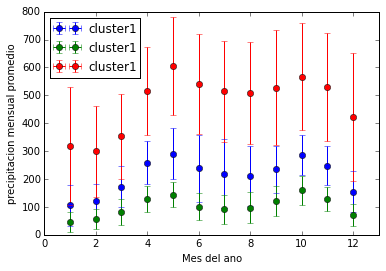

In [446]:
plt.errorbar(x,prom3,xerr=0,label="cluster1",yerr=np.var(prec[cluster==0,:],axis=0)**0.5,fmt="o")
plt.errorbar(x,prom4,xerr=0,label="cluster1",yerr=np.var(prec[cluster==1,:],axis=0)**0.5,fmt="o")
plt.errorbar(x,prom5,xerr=0,label="cluster1",yerr=np.var(prec[cluster==2,:],axis=0)**0.5,fmt="o")
plt.legend(loc=0)
plt.xlabel("Mes del ano")
plt.ylabel("precipitacion mensual promedio")
plt.xlim(0,  13)


Se puede notar que para ambos GMM, las poblaciones siguen una misma tendecia, lo que cambia entre ellas es la precipitacion. Esto se debe a la forma como organizan los datos (?)